In [13]:
from data import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

from sklearn import tree

import matplotlib.pyplot as plt

In [2]:
df = read_data(is_small=False) # 'tx_crash.csv' the new feature does not seem useful, acc=0.815
#df = read_data()

df_X = df.drop(columns=['tot_crash_count', 'crash'])
df_y = df['crash']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [18]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(572792, 47)
(63644, 47)
(70716, 47)


In [4]:
rf = RandomForestClassifier(random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1)

In [5]:
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)

In [6]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    423729
           1       1.00      1.00      1.00    149063

    accuracy                           1.00    572792
   macro avg       1.00      1.00      1.00    572792
weighted avg       1.00      1.00      1.00    572792



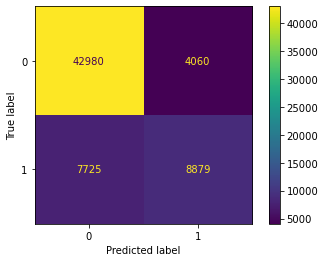

In [7]:
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)

In [8]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     47040
           1       0.69      0.53      0.60     16604

    accuracy                           0.81     63644
   macro avg       0.77      0.72      0.74     63644
weighted avg       0.81      0.81      0.81     63644



In [9]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = list(X_train.columns)

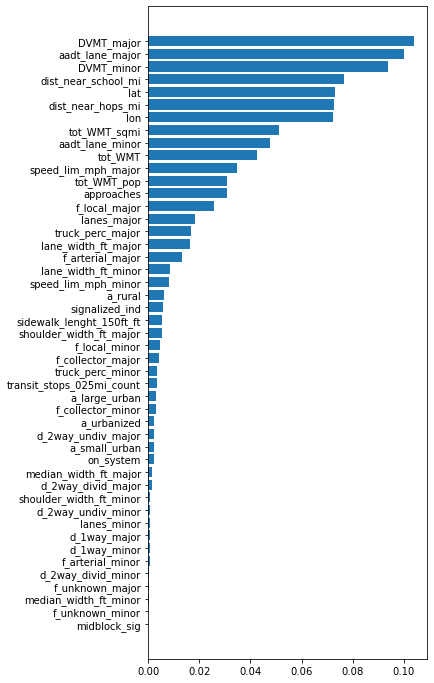

In [10]:
plt.figure(figsize=(5,12))
plt.barh(range(len(indices)), importances[indices]);
plt.yticks(range(len(indices)), [features[i] for i in indices]);

In [11]:
# tune hyperparameter
rf = RandomForestClassifier(n_estimators=50, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)

In [12]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     47040
           1       0.69      0.53      0.60     16604

    accuracy                           0.81     63644
   macro avg       0.77      0.72      0.74     63644
weighted avg       0.80      0.81      0.81     63644



In [15]:
f1_score(y_val, y_val_pred, average='micro')

0.8142794293256237